In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

%matplotlib inline

In [2]:
clean_data=pd.read_csv('../data/teis_final_data.csv')

##Question 4

Look for patterns in referrals and re-referrals on the basis of the following:
    - Age
    - Referral source
    - Socioeconomic status (County SES)

In [3]:
#data cleaned that was shared in class
clean_data.head(5)

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Service Coordinator,Parent Consent,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Referral Source Type Name,Year
0,104085,2018-01-20,2017-2018,Jan,Middle,2017.0,2010-07-07,1.0,3.0,GN,...,NaN,NaN,NaN,NaN,NaN,NaN,Unable to contact,2010-01-25,DCS,2018
1,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,Steven Scarlett,NaN,NaN,NaN,NaN,NaN,Unable to contact,2016-08-31,PCP,2016
2,351755,2016-07-12,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0,NW,...,Rene Bard,2016-07-12,Ineligible,8/25/2016,NaN,NaN,Ineligible for Part C,2016-08-25,Parent,2016
3,353800,2016-09-14,2016-2017,Sep,Eastern,2016.0,2016-10-01,1.0,1.0,FT,...,Jennifer Terranera - 45 days,NaN,NaN,NaN,NaN,NaN,Referral less than 45 days,2016-09-15,Parent,2016
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,Anna Bolin,2016-08-15,Eligible,10/5/2016,10/10/2016,NaN,618 - Part B eligibility not determined,2016-12-03,Dept. of Health,2016


In [4]:
#keeping only the columns necessary to answer the question
age = clean_data[['Notification Date','DOB', 'Exit Date','POE','Child ID','County Name','County SES']]
age

,Notification Date,DOB,Exit Date,POE,Child ID,County Name,County SES
0,2018-01-20,2007-07-07,2010-01-25,GN,104085,Davidson,Competitive
1,2016-08-17,2013-10-15,2016-08-31,UC,350065,Jackson,At-Risk
2,2016-07-12,2013-11-13,2016-08-25,NW,351755,Madison,Transitional
3,2016-09-14,2013-10-01,2016-09-15,FT,353800,Hawkins,At-Risk
4,2016-08-05,2013-12-04,2016-12-03,UC,353805,Putnam,Transitional
...,...,...,...,...,...,...,...
115519,2022-07-01,2020-05-20,NaN,GN,531592,Montgomery,Transitional
115520,2022-07-01,2021-12-07,NaN,GN,531593,Davidson,Competitive
115521,2022-07-01,2022-06-21,NaN,GN,531594,Montgomery,Transitional
115522,2022-07-01,2022-06-17,NaN,GN,531595,Davidson,Competitive


In [5]:
#checking columns type
age.dtypes

Notification Date    object
DOB                  object
Exit Date            object
POE                  object
Child ID              int64
County Name          object
County SES           object
dtype: object

In [ ]:
# trasforming notification date, DOB, and Exit date from object into datetime

In [6]:
age['Notification Date']=pd.to_datetime(age['Notification Date'])

C:\Users\bruna\AppData\Local\Temp/ipykernel_20320/710523179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['Notification Date']=pd.to_datetime(age['Notification Date'])


In [7]:
age['DOB']=pd.to_datetime(age['DOB'])

C:\Users\bruna\AppData\Local\Temp/ipykernel_20320/356649217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['DOB']=pd.to_datetime(age['DOB'])


In [8]:
age['Exit Date']=pd.to_datetime(age['Exit Date'])

C:\Users\bruna\AppData\Local\Temp/ipykernel_20320/1909452053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['Exit Date']=pd.to_datetime(age['Exit Date'])


In [9]:
age.dtypes

Notification Date    datetime64[ns]
DOB                  datetime64[ns]
Exit Date            datetime64[ns]
POE                          object
Child ID                      int64
County Name                  object
County SES                   object
dtype: object

In [10]:
# creating a column for kids ages from the notification date column
age['kids_notification_age'] = (age['Notification Date'] - age['DOB'])
age

C:\Users\bruna\AppData\Local\Temp/ipykernel_20320/3130359397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['kids_notification_age'] = (age['Notification Date'] - age['DOB'])


,Notification Date,DOB,Exit Date,POE,Child ID,County Name,County SES,kids_notification_age
0,2018-01-20,2007-07-07,2010-01-25,GN,104085,Davidson,Competitive,3850 days
1,2016-08-17,2013-10-15,2016-08-31,UC,350065,Jackson,At-Risk,1037 days
2,2016-07-12,2013-11-13,2016-08-25,NW,351755,Madison,Transitional,972 days
3,2016-09-14,2013-10-01,2016-09-15,FT,353800,Hawkins,At-Risk,1079 days
4,2016-08-05,2013-12-04,2016-12-03,UC,353805,Putnam,Transitional,975 days
...,...,...,...,...,...,...,...,...
115519,2022-07-01,2020-05-20,NaT,GN,531592,Montgomery,Transitional,772 days
115520,2022-07-01,2021-12-07,NaT,GN,531593,Davidson,Competitive,206 days
115521,2022-07-01,2022-06-21,NaT,GN,531594,Montgomery,Transitional,10 days
115522,2022-07-01,2022-06-17,NaT,GN,531595,Davidson,Competitive,14 days


In [11]:
# creating a column for kids ages from the exit date column
age['kids_exit_age'] = (age['Exit Date'] - age['DOB'])
age

C:\Users\bruna\AppData\Local\Temp/ipykernel_20320/4041755174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['kids_exit_age'] = (age['Exit Date'] - age['DOB'])


,Notification Date,DOB,Exit Date,POE,Child ID,County Name,County SES,kids_notification_age,kids_exit_age
0,2018-01-20,2007-07-07,2010-01-25,GN,104085,Davidson,Competitive,3850 days,933 days
1,2016-08-17,2013-10-15,2016-08-31,UC,350065,Jackson,At-Risk,1037 days,1051 days
2,2016-07-12,2013-11-13,2016-08-25,NW,351755,Madison,Transitional,972 days,1016 days
3,2016-09-14,2013-10-01,2016-09-15,FT,353800,Hawkins,At-Risk,1079 days,1080 days
4,2016-08-05,2013-12-04,2016-12-03,UC,353805,Putnam,Transitional,975 days,1095 days
...,...,...,...,...,...,...,...,...,...
115519,2022-07-01,2020-05-20,NaT,GN,531592,Montgomery,Transitional,772 days,NaT
115520,2022-07-01,2021-12-07,NaT,GN,531593,Davidson,Competitive,206 days,NaT
115521,2022-07-01,2022-06-21,NaT,GN,531594,Montgomery,Transitional,10 days,NaT
115522,2022-07-01,2022-06-17,NaT,GN,531595,Davidson,Competitive,14 days,NaT


In [12]:
# transforming days in months
age['month_notification_age'] = age['kids_exit_age'].dt.days/30
age

C:\Users\bruna\AppData\Local\Temp/ipykernel_20320/4261661441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['month_notification_age'] = age['kids_exit_age'].dt.days/30


,Notification Date,DOB,Exit Date,POE,Child ID,County Name,County SES,kids_notification_age,kids_exit_age,month_notification_age
0,2018-01-20,2007-07-07,2010-01-25,GN,104085,Davidson,Competitive,3850 days,933 days,31.100000
1,2016-08-17,2013-10-15,2016-08-31,UC,350065,Jackson,At-Risk,1037 days,1051 days,35.033333
2,2016-07-12,2013-11-13,2016-08-25,NW,351755,Madison,Transitional,972 days,1016 days,33.866667
3,2016-09-14,2013-10-01,2016-09-15,FT,353800,Hawkins,At-Risk,1079 days,1080 days,36.000000
4,2016-08-05,2013-12-04,2016-12-03,UC,353805,Putnam,Transitional,975 days,1095 days,36.500000
...,...,...,...,...,...,...,...,...,...,...
115519,2022-07-01,2020-05-20,NaT,GN,531592,Montgomery,Transitional,772 days,NaT,NaN
115520,2022-07-01,2021-12-07,NaT,GN,531593,Davidson,Competitive,206 days,NaT,NaN
115521,2022-07-01,2022-06-21,NaT,GN,531594,Montgomery,Transitional,10 days,NaT,NaN
115522,2022-07-01,2022-06-17,NaT,GN,531595,Davidson,Competitive,14 days,NaT,NaN


In [13]:
# transforming days in years
age['years_notification_age'] = age['kids_exit_age'].dt.days/365
age

C:\Users\bruna\AppData\Local\Temp/ipykernel_20320/54771482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['years_notification_age'] = age['kids_exit_age'].dt.days/365


,Notification Date,DOB,Exit Date,POE,Child ID,County Name,County SES,kids_notification_age,kids_exit_age,month_notification_age,years_notification_age
0,2018-01-20,2007-07-07,2010-01-25,GN,104085,Davidson,Competitive,3850 days,933 days,31.100000,2.556164
1,2016-08-17,2013-10-15,2016-08-31,UC,350065,Jackson,At-Risk,1037 days,1051 days,35.033333,2.879452
2,2016-07-12,2013-11-13,2016-08-25,NW,351755,Madison,Transitional,972 days,1016 days,33.866667,2.783562
3,2016-09-14,2013-10-01,2016-09-15,FT,353800,Hawkins,At-Risk,1079 days,1080 days,36.000000,2.958904
4,2016-08-05,2013-12-04,2016-12-03,UC,353805,Putnam,Transitional,975 days,1095 days,36.500000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...
115519,2022-07-01,2020-05-20,NaT,GN,531592,Montgomery,Transitional,772 days,NaT,NaN,NaN
115520,2022-07-01,2021-12-07,NaT,GN,531593,Davidson,Competitive,206 days,NaT,NaN,NaN
115521,2022-07-01,2022-06-21,NaT,GN,531594,Montgomery,Transitional,10 days,NaT,NaN,NaN
115522,2022-07-01,2022-06-17,NaT,GN,531595,Davidson,Competitive,14 days,NaT,NaN,NaN


In [14]:
# using only kids that are between 0 and 3 years old only (cleaning any outlier)
age = age[age['kids_notification_age'] < '1096 days']
age

,Notification Date,DOB,Exit Date,POE,Child ID,County Name,County SES,kids_notification_age,kids_exit_age,month_notification_age,years_notification_age
1,2016-08-17,2013-10-15,2016-08-31,UC,350065,Jackson,At-Risk,1037 days,1051 days,35.033333,2.879452
2,2016-07-12,2013-11-13,2016-08-25,NW,351755,Madison,Transitional,972 days,1016 days,33.866667,2.783562
3,2016-09-14,2013-10-01,2016-09-15,FT,353800,Hawkins,At-Risk,1079 days,1080 days,36.000000,2.958904
4,2016-08-05,2013-12-04,2016-12-03,UC,353805,Putnam,Transitional,975 days,1095 days,36.500000,3.000000
5,2016-09-29,2013-10-09,2016-09-29,MD,353900,Shelby,Transitional,1086 days,1086 days,36.200000,2.975342
...,...,...,...,...,...,...,...,...,...,...,...
115519,2022-07-01,2020-05-20,NaT,GN,531592,Montgomery,Transitional,772 days,NaT,NaN,NaN
115520,2022-07-01,2021-12-07,NaT,GN,531593,Davidson,Competitive,206 days,NaT,NaN,NaN
115521,2022-07-01,2022-06-21,NaT,GN,531594,Montgomery,Transitional,10 days,NaT,NaN,NaN
115522,2022-07-01,2022-06-17,NaT,GN,531595,Davidson,Competitive,14 days,NaT,NaN,NaN


In [15]:
# turning exit date into monthly
age['month_exit_age'] = age['kids_exit_age'].dt.days/30
age

C:\Users\bruna\AppData\Local\Temp/ipykernel_20320/1451372881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['month_exit_age'] = age['kids_exit_age'].dt.days/30


,Notification Date,DOB,Exit Date,POE,Child ID,County Name,County SES,kids_notification_age,kids_exit_age,month_notification_age,years_notification_age,month_exit_age
1,2016-08-17,2013-10-15,2016-08-31,UC,350065,Jackson,At-Risk,1037 days,1051 days,35.033333,2.879452,35.033333
2,2016-07-12,2013-11-13,2016-08-25,NW,351755,Madison,Transitional,972 days,1016 days,33.866667,2.783562,33.866667
3,2016-09-14,2013-10-01,2016-09-15,FT,353800,Hawkins,At-Risk,1079 days,1080 days,36.000000,2.958904,36.000000
4,2016-08-05,2013-12-04,2016-12-03,UC,353805,Putnam,Transitional,975 days,1095 days,36.500000,3.000000,36.500000
5,2016-09-29,2013-10-09,2016-09-29,MD,353900,Shelby,Transitional,1086 days,1086 days,36.200000,2.975342,36.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
115519,2022-07-01,2020-05-20,NaT,GN,531592,Montgomery,Transitional,772 days,NaT,NaN,NaN,NaN
115520,2022-07-01,2021-12-07,NaT,GN,531593,Davidson,Competitive,206 days,NaT,NaN,NaN,NaN
115521,2022-07-01,2022-06-21,NaT,GN,531594,Montgomery,Transitional,10 days,NaT,NaN,NaN,NaN
115522,2022-07-01,2022-06-17,NaT,GN,531595,Davidson,Competitive,14 days,NaT,NaN,NaN,NaN


In [16]:
# turning exit date into year
age['years_exit_age'] = age['kids_exit_age'].dt.days/365
age

C:\Users\bruna\AppData\Local\Temp/ipykernel_20320/2328607419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['years_exit_age'] = age['kids_exit_age'].dt.days/365


,Notification Date,DOB,Exit Date,POE,Child ID,County Name,County SES,kids_notification_age,kids_exit_age,month_notification_age,years_notification_age,month_exit_age,years_exit_age
1,2016-08-17,2013-10-15,2016-08-31,UC,350065,Jackson,At-Risk,1037 days,1051 days,35.033333,2.879452,35.033333,2.879452
2,2016-07-12,2013-11-13,2016-08-25,NW,351755,Madison,Transitional,972 days,1016 days,33.866667,2.783562,33.866667,2.783562
3,2016-09-14,2013-10-01,2016-09-15,FT,353800,Hawkins,At-Risk,1079 days,1080 days,36.000000,2.958904,36.000000,2.958904
4,2016-08-05,2013-12-04,2016-12-03,UC,353805,Putnam,Transitional,975 days,1095 days,36.500000,3.000000,36.500000,3.000000
5,2016-09-29,2013-10-09,2016-09-29,MD,353900,Shelby,Transitional,1086 days,1086 days,36.200000,2.975342,36.200000,2.975342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,2022-07-01,2020-05-20,NaT,GN,531592,Montgomery,Transitional,772 days,NaT,NaN,NaN,NaN,NaN
115520,2022-07-01,2021-12-07,NaT,GN,531593,Davidson,Competitive,206 days,NaT,NaN,NaN,NaN,NaN
115521,2022-07-01,2022-06-21,NaT,GN,531594,Montgomery,Transitional,10 days,NaT,NaN,NaN,NaN,NaN
115522,2022-07-01,2022-06-17,NaT,GN,531595,Davidson,Competitive,14 days,NaT,NaN,NaN,NaN,NaN


In [17]:
#dropping duplicates to get only referrals
age_referrals = age.drop_duplicates('Child ID')
age_referrals

,Notification Date,DOB,Exit Date,POE,Child ID,County Name,County SES,kids_notification_age,kids_exit_age,month_notification_age,years_notification_age,month_exit_age,years_exit_age
1,2016-08-17,2013-10-15,2016-08-31,UC,350065,Jackson,At-Risk,1037 days,1051 days,35.033333,2.879452,35.033333,2.879452
2,2016-07-12,2013-11-13,2016-08-25,NW,351755,Madison,Transitional,972 days,1016 days,33.866667,2.783562,33.866667,2.783562
3,2016-09-14,2013-10-01,2016-09-15,FT,353800,Hawkins,At-Risk,1079 days,1080 days,36.000000,2.958904,36.000000,2.958904
4,2016-08-05,2013-12-04,2016-12-03,UC,353805,Putnam,Transitional,975 days,1095 days,36.500000,3.000000,36.500000,3.000000
5,2016-09-29,2013-10-09,2016-09-29,MD,353900,Shelby,Transitional,1086 days,1086 days,36.200000,2.975342,36.200000,2.975342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,2022-07-01,2020-05-20,NaT,GN,531592,Montgomery,Transitional,772 days,NaT,NaN,NaN,NaN,NaN
115520,2022-07-01,2021-12-07,NaT,GN,531593,Davidson,Competitive,206 days,NaT,NaN,NaN,NaN,NaN
115521,2022-07-01,2022-06-21,NaT,GN,531594,Montgomery,Transitional,10 days,NaT,NaN,NaN,NaN,NaN
115522,2022-07-01,2022-06-17,NaT,GN,531595,Davidson,Competitive,14 days,NaT,NaN,NaN,NaN,NaN


In [18]:
# referrals only
age_referrals.describe()

,Child ID,kids_notification_age,kids_exit_age,month_notification_age,years_notification_age,month_exit_age,years_exit_age
count,96731.000000,96731,78027,78027.000000,78027.000000,78027.000000,78027.000000
mean,465546.444728,471 days 17:02:47.214233288,669 days 16:07:56.142873616,22.322406,1.834718,22.322406,1.834718
std,38158.318297,322 days 15:46:38.113216064,380 days 11:13:37.985395848,12.682260,1.042378,12.682260,1.042378
min,350065.000000,-178 days +00:00:00,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,430722.500000,133 days 00:00:00,317 days 00:00:00,10.566667,0.868493,10.566667,0.868493
50%,467097.000000,519 days 00:00:00,755 days 00:00:00,25.166667,2.068493,25.166667,2.068493
75%,497839.500000,745 days 00:00:00,1075 days 00:00:00,35.833333,2.945205,35.833333,2.945205
max,531596.000000,1095 days 00:00:00,1114 days 00:00:00,37.133333,3.052055,37.133333,3.052055


In [19]:
# re referrals
age_reref = age[age.duplicated(subset = "Child ID", keep= 'first')]
#age_reref = age.groupby(["Child ID"]).nunique()
age_reref.describe()

,Child ID,kids_notification_age,kids_exit_age,month_notification_age,years_notification_age,month_exit_age,years_exit_age
count,18777.000000,18777,7153,7153.000000,7153.000000,7153.000000,7153.000000
mean,457933.427438,448 days 23:27:29.017414928,791 days 01:35:25.373968968,26.368876,2.167305,26.368876,2.167305
std,34443.360161,304 days 18:14:49.497391528,311 days 22:51:00.948175820,10.398403,0.854663,10.398403,0.854663
min,360966.000000,0 days 00:00:00,26 days 00:00:00,0.866667,0.071233,0.866667,0.071233
25%,426605.000000,159 days 00:00:00,575 days 00:00:00,19.166667,1.575342,19.166667,1.575342
50%,459488.000000,459 days 00:00:00,876 days 00:00:00,29.200000,2.400000,29.200000,2.400000
75%,486426.000000,720 days 00:00:00,1094 days 00:00:00,36.466667,2.997260,36.466667,2.997260
max,529524.000000,1095 days 00:00:00,1096 days 00:00:00,36.533333,3.002740,36.533333,3.002740


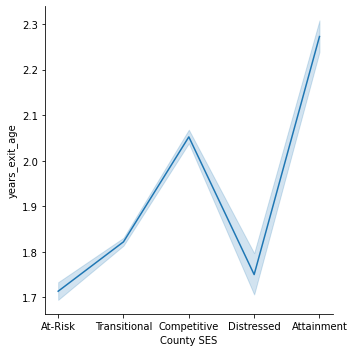

In [20]:
# total (referrals and rereferrals)
age_total = sns.relplot(data = age, x = 'County SES', y = 'years_exit_age', kind = 'line');

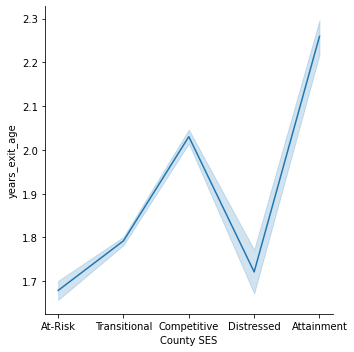

In [21]:
# referrals only
age_ses_exit_ref = sns.relplot(data = age_referrals, x = 'County SES', y = 'years_exit_age', kind = 'line');

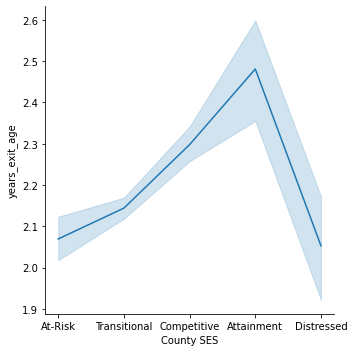

In [22]:
# re-referrals
age_ses_exit_reref = sns.relplot(data = age_reref, x = 'County SES', y = 'years_exit_age', kind = 'line');

In [38]:
#same above
age.groupby(['County SES']).mean()

,Child ID,month_notification_age,years_notification_age,month_exit_age,years_exit_age
County SES,,,,,
At-Risk,461279.672516,20.849132,1.713627,20.849132,1.713627
Attainment,465525.664545,27.651690,2.272742,27.651690,2.272742
Competitive,467957.851790,24.971593,2.052460,24.971593,2.052460
Distressed,460223.871130,21.294212,1.750209,21.294212,1.750209
Transitional,463834.371193,22.168469,1.822066,22.168469,1.822066
